# time-series-data  predicting using RNN

In [1]:
import numpy as np
from numpy import nan
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
data = pd.read_csv('power_consumption.csv',sep = ';')
data.head()

C:\Users\prince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
data['date_time'] = data['Date'].str.cat(data['Time'], sep= ' ')
data.drop(['Date', 'Time'], inplace= True, axis = 1)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
Global_active_power      object
Global_reactive_power    object
Voltage                  object
Global_intensity         object
Sub_metering_1           object
Sub_metering_2           object
Sub_metering_3           float64
date_time                object
dtypes: float64(1), object(7)
memory usage: 126.7+ MB


In [5]:
data.set_index(['date_time'], inplace=True)
data.replace('?', nan, inplace=True)
data = data.astype('float')

In [6]:
data=data.dropna()

In [7]:
print("shape:", data.shape)
print('\n')
print(data.isnull().sum())


shape: (2049280, 7)


Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


In [8]:
# Converting the index as date
data.index = pd.to_datetime(data.index)

In [9]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [10]:
data = data.resample('D').sum()

In [11]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


C:\Users\prince\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


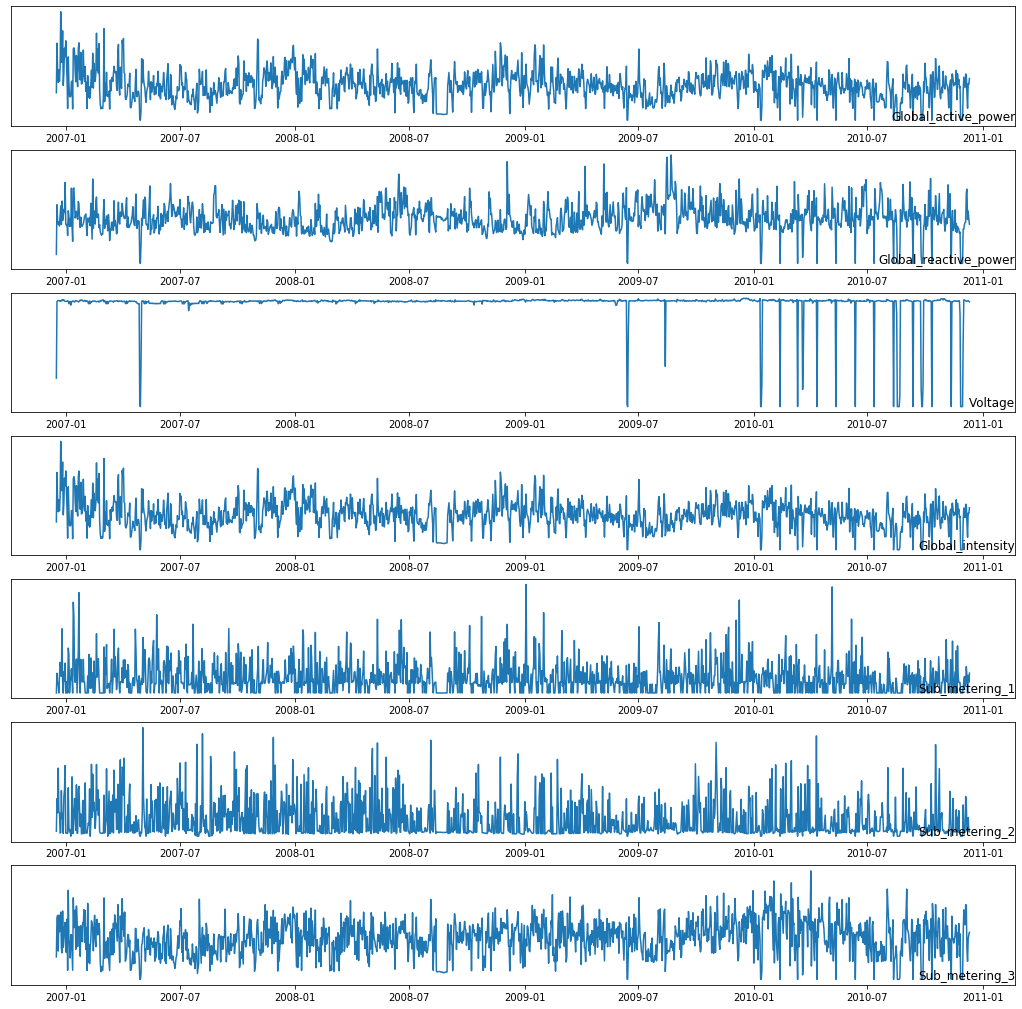

In [12]:
fig, ax = plt.subplots(figsize=(18,18))
for i in range(len(data.columns)):
    plt.subplot(len(data.columns), 1, i+1)
    name = data.columns[i]
    plt.plot(data[name])
    plt.title(name, y=0, loc = 'right')
    plt.yticks([])
plt.show()
fig.tight_layout()

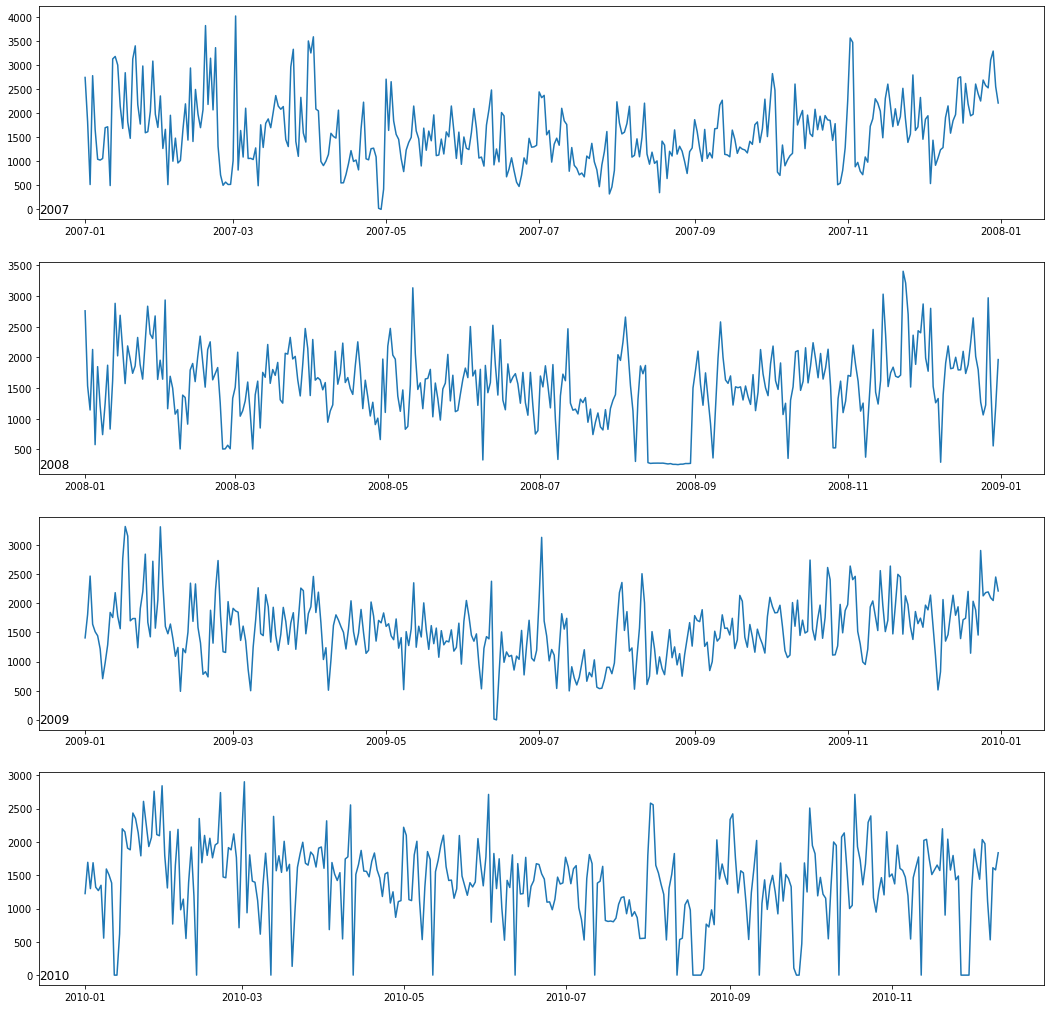

In [13]:
years = ['2007', '2008', '2009', '2010']

fig, ax = plt.subplots(figsize=(18,18))
for i in range(len(years)):
    plt.subplot(len(years), 1, i+1)
    year = years[i]
    active_power_data = data[str(year)]
    plt.plot(active_power_data['Global_active_power'])
    plt.title(str(year), y = 0, loc = 'left')
plt.show()
fig.tight_layout()

In [14]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [15]:
data_train = data.loc[:'2009-12-31', :]['Global_active_power']
data_train.head()

date_time
2006-12-16    1209.176
2006-12-17    3390.460
2006-12-18    2203.826
2006-12-19    1666.194
2006-12-20    2225.748
Freq: D, Name: Global_active_power, dtype: float64

In [16]:
data_test = data['2010']['Global_active_power']
data_test.head()

date_time
2010-01-01    1224.252
2010-01-02    1693.778
2010-01-03    1298.728
2010-01-04    1687.440
2010-01-05    1320.158
Freq: D, Name: Global_active_power, dtype: float64

In [17]:
#preparing train data
data_train = np.array(data_train)
print(data_train)

X_train, y_train = [], []
for i in range(7, len(data_train)-7):
    X_train.append(data_train[i-7:i])
    y_train.append(data_train[i:i+7])
    
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape, y_train.shape

[1209.176 3390.46  2203.826 ... 2047.968 2451.11  2211.892]


((1098, 7), (1098, 7))

In [18]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6
0,1209.176,3390.460,2203.826,1666.194,2225.748,1716.624,2341.338
1,3390.460,2203.826,1666.194,2225.748,1716.624,2341.338,4773.386
2,2203.826,1666.194,2225.748,1716.624,2341.338,4773.386,2550.012
3,1666.194,2225.748,1716.624,2341.338,4773.386,2550.012,2743.120
4,2225.748,1716.624,2341.338,4773.386,2550.012,2743.120,3934.110


In [21]:
x_scaler = MinMaxScaler()
X_train = x_scaler.fit_transform(X_train)

y_scaler = MinMaxScaler()
y_train = y_scaler.fit_transform(y_train)

In [22]:
X_train = X_train.reshape(1098, 7, 1)

In [27]:
model = Sequential()
model.add(LSTM(units = 200, activation = 'relu', input_shape=(7,1)))
model.add(Dense(7))

model.compile(loss='mse', optimizer='adam',metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 200)               161600    
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 1407      
Total params: 163,007
Trainable params: 163,007
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
35/35 [==============================] - 0s 6ms/step - loss: 0.0678 - accuracy: 0.1612
Epoch 2/100
35/35 [==============================] - 0s 5ms/step - loss: 0.0221 - accuracy: 0.1658
Epoch 3/100
35/35 [==============================] - 0s 5ms/step - loss: 0.0217 - accuracy: 0.1448
Epoch 4/100
35/35 [==============================] - 0s 6ms/step - loss: 0.0217 - accuracy: 0.1730
Epoch 5/100
35/35 [==============================] - 0s 5ms/step - loss: 0.0217 - accuracy: 0.1412
Epoch 6/100
35/35 [==============================] - 0s 5ms/step - loss: 0.0216 - accuracy: 0.1448
Epoch 7/100
35/35 [==============================] - 0s 6ms/step - loss: 0.0216 - accuracy: 0.1330
Epoch 8/100
35/35 [==============================] - 0s 6ms/step - loss: 0.0217 - accuracy: 0.1603
Epoch 9/100
35/35 [==============================] - 0s 6ms/step - loss: 0.0216 - accuracy: 0.1430
Epoch 10/100
35/35 [==============================] - 0s 5ms/step - loss: 0.0217 - accuracy: 0.1557
Epoch 11/

35/35 [==============================] - 0s 5ms/step - loss: 0.0209 - accuracy: 0.1821
Epoch 84/100
35/35 [==============================] - 0s 5ms/step - loss: 0.0208 - accuracy: 0.1758
Epoch 85/100
35/35 [==============================] - 0s 5ms/step - loss: 0.0209 - accuracy: 0.1758
Epoch 86/100
35/35 [==============================] - 0s 5ms/step - loss: 0.0208 - accuracy: 0.1903
Epoch 87/100
35/35 [==============================] - 0s 5ms/step - loss: 0.0209 - accuracy: 0.1831
Epoch 88/100
35/35 [==============================] - 0s 5ms/step - loss: 0.0208 - accuracy: 0.1730
Epoch 89/100
35/35 [==============================] - 0s 5ms/step - loss: 0.0216 - accuracy: 0.1776
Epoch 90/100
35/35 [==============================] - 0s 5ms/step - loss: 0.0212 - accuracy: 0.1776
Epoch 91/100
35/35 [==============================] - 0s 5ms/step - loss: 0.0209 - accuracy: 0.1630
Epoch 92/100
35/35 [==============================] - 0s 6ms/step - loss: 0.0208 - accuracy: 0.1840
Epoch 93/100


In [30]:
data_test = np.array(data_test)

In [31]:
X_test, y_test = [], []

for i in range(7, len(data_test)-7):
    X_test.append(data_test[i-7:i])
    y_test.append(data_test[i:i+7])

In [32]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [33]:
X_test = x_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)

In [34]:
X_test = X_test.reshape(331,7,1)

In [35]:
y_pred = model.predict(X_test)

In [36]:
y_pred = y_scaler.inverse_transform(y_pred)
y_pred

array([[1461.2997, 1464.2083, 1494.5945, ..., 1592.2465, 1557.336 ,
        1626.6274],
       [1054.5845, 1254.4365, 1370.3704, ..., 1570.6711, 1533.699 ,
        1573.7004],
       [1521.7981, 1496.0236, 1515.5989, ..., 1533.9463, 1487.1593,
        1556.4856],
       ...,
       [1040.8507, 1054.7538, 1103.5632, ..., 1013.8962, 1031.9823,
        1101.8735],
       [1470.4465, 1294.2593, 1210.944 , ..., 1021.4331, 1050.3676,
        1191.9967],
       [1445.379 , 1251.6641, 1145.4565, ..., 1050.4424, 1104.3987,
        1279.2362]], dtype=float32)

In [37]:
y_true = y_scaler.inverse_transform(y_test)
y_true

array([[ 555.664, 1593.318, 1504.82 , ...,    0.   ,    0.   ,  618.488],
       [1593.318, 1504.82 , 1383.18 , ...,    0.   ,  618.488, 2196.76 ],
       [1504.82 , 1383.18 ,    0.   , ...,  618.488, 2196.76 , 2150.112],
       ...,
       [1892.998, 1645.424, 1439.426, ..., 1973.108, 1109.574,  529.698],
       [1645.424, 1439.426, 2035.418, ..., 1109.574,  529.698, 1612.092],
       [1439.426, 2035.418, 1973.108, ...,  529.698, 1612.092, 1579.692]])

In [38]:
def evaluate_model(y_true, y_predicted):
    scores = []
    
    #calculate scores for each day
    for i in range(y_true.shape[1]):
        mse = mean_squared_error(y_true[:, i], y_predicted[:, i])
        rmse = np.sqrt(mse)
        scores.append(rmse)
    
    #calculate score for whole prediction
    total_score = 0
    for row in range(y_true.shape[0]):
        for col in range(y_predicted.shape[1]):
            total_score = total_score + (y_true[row, col] - y_predicted[row, col])**2
    total_score = np.sqrt(total_score/(y_true.shape[0]*y_predicted.shape[1]))
    
    return total_score, scores

In [39]:
evaluate_model(y_true, y_pred)

(637.714627032777,
 [600.6680253339183,
  627.3610620236337,
  630.2641530087102,
  650.4723486925642,
  654.5744123881866,
  643.1286191073712,
  655.7029654265783])